In [1]:
#data preparation

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#read data
data = pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [5]:
data.num.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [6]:
data.shape

(908, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
#EDA

In [9]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [10]:
#checking for null values
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [11]:
#filling the null values
for value in ['oldpeak']:
    data[value].fillna(data[value].mean(),inplace=True)

In [12]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

<Axes: >

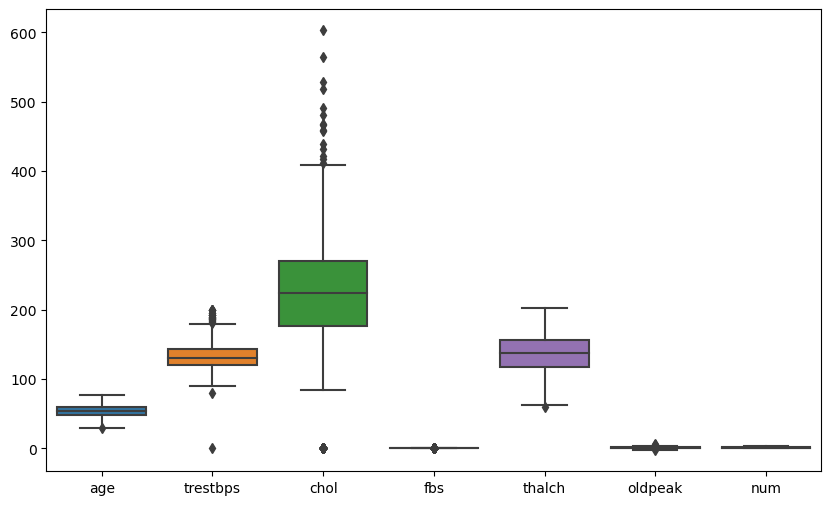

In [13]:
#checking outlier using boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=data)

In [14]:
#removing outlier
data_new = data[(data['chol']>110)&(data['chol']<370)&(data['trestbps']<170)]

(662, 13)


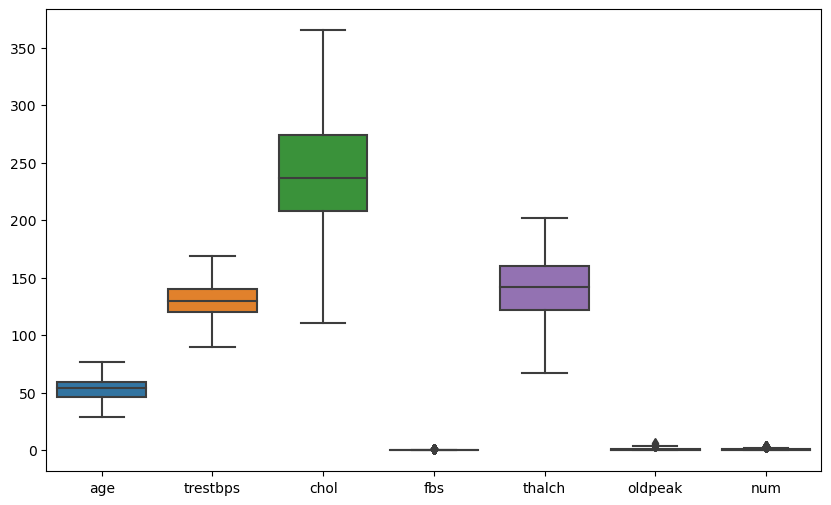

In [15]:
#checking boxplot after removing outlier
plt.figure(figsize=(10,6))
sns.boxplot(data=data_new)
print(data_new.shape)

C:\Users\sheetal\AppData\Local\Temp\ipykernel_22968\1817183893.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_new.corr(), annot=True)


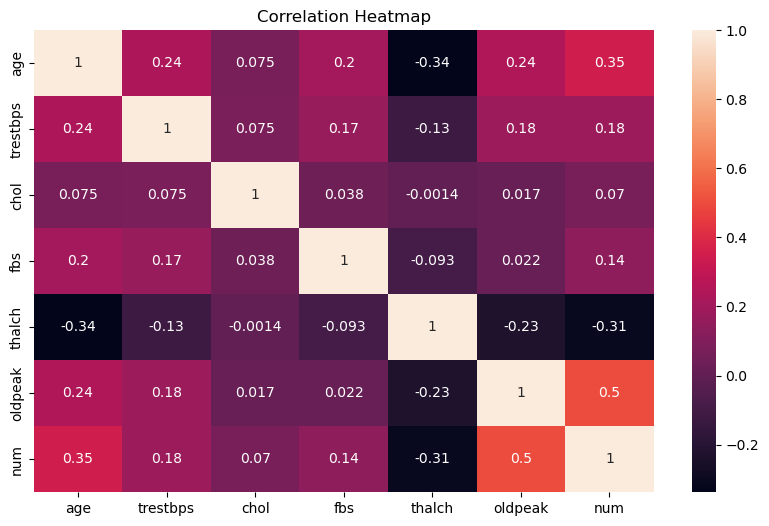

In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data_new.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [17]:
#there is correlation between oldpeak and num(0.5) and negative correlation between age and thalch(-0.34)

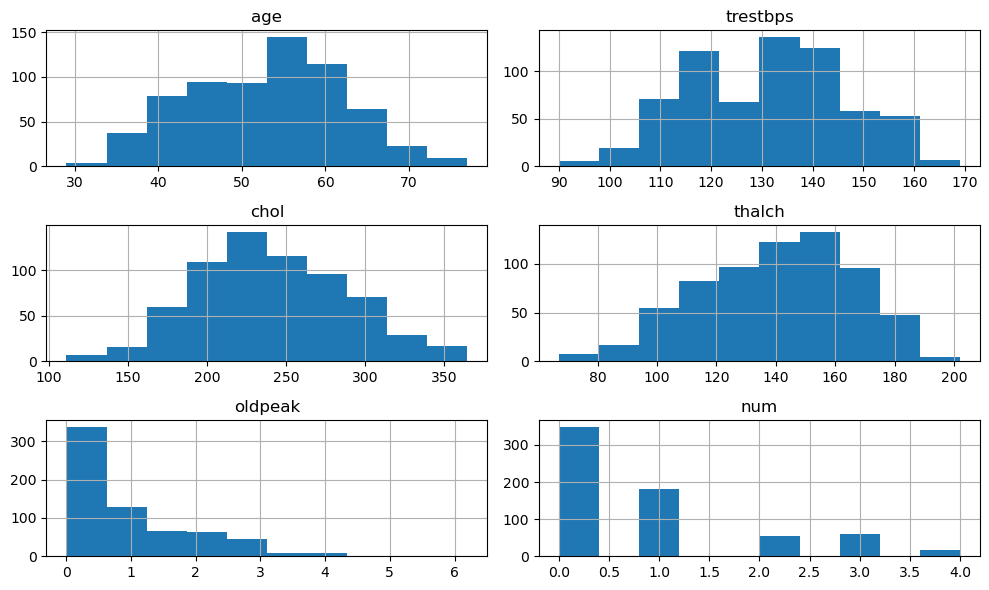

In [18]:
#drawing histogram for each feature
data_new.hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [19]:
#feature Engineering

In [20]:
#seperating categorical columns for encoding
object_list = []
for i in data_new.columns:
    if data_new[i].dtype == 'object':
        object_list.append(i)
object_list  

['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']

In [21]:
data_new['exang'].unique()

array([False, True, 'TURE', 'FALSE'], dtype=object)

In [22]:
# Convert all values to strings
data_new['exang'] = data_new['exang'].astype(str)

C:\Users\sheetal\AppData\Local\Temp\ipykernel_22968\1265863367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['exang'] = data_new['exang'].astype(str)


In [23]:
# Replace it
data_new.loc[data_new['exang'] == 'TURE', 'exang'] = 'True'
data_new.loc[data_new['exang'] == 'FALSE', 'exang'] = 'False'

In [24]:
data_new['exang'].unique()

array(['False', 'True'], dtype=object)

In [25]:
#converting categorical column into numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in object_list:
    data_new[x] = le.fit_transform(data_new[x])
    le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
    print('Feature: ',x)
    print('Mapping: ',le_name_mapping)

Feature:  sex
Mapping:  {'Female': 0, 'Male': 1}
Feature:  cp
Mapping:  {'asymptomatic': 0, 'atypical angina': 1, 'non-anginal': 2, 'typical angina': 3}
Feature:  restecg
Mapping:  {'lv hypertrophy': 0, 'normal': 1, 'st-t abnormality': 2}
Feature:  exang
Mapping:  {'False': 0, 'True': 1}
Feature:  slope
Mapping:  {'downsloping': 0, 'flat': 1, 'upsloping': 2}
Feature:  thal
Mapping:  {'fixed defect': 0, 'normal': 1, 'reversable defect': 2}


C:\Users\sheetal\AppData\Local\Temp\ipykernel_22968\4105784450.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[x] = le.fit_transform(data_new[x])
C:\Users\sheetal\AppData\Local\Temp\ipykernel_22968\4105784450.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[x] = le.fit_transform(data_new[x])
C:\Users\sheetal\AppData\Local\Temp\ipykernel_22968\4105784450.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [26]:
# Convert boolean values to numerical
data_new['fbs'] = data_new['fbs'].map({False: 0, True: 1})

C:\Users\sheetal\AppData\Local\Temp\ipykernel_22968\3450774260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['fbs'] = data_new['fbs'].map({False: 0, True: 1})


In [27]:
data_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0


In [28]:
#split data into x and y
x = data_new.drop(columns='num')
y = data_new['num']

In [29]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,0,2.300000,0,0
1,41,1,1,135,203,0,1,132,0,0.000000,1,0
2,57,1,0,140,192,0,1,148,0,0.400000,1,0
3,52,1,3,118,186,0,0,190,0,0.000000,1,0
4,57,1,0,110,201,0,1,126,1,1.500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
899,65,1,0,136,248,0,1,140,1,4.000000,0,2
902,62,1,0,160,254,1,2,108,1,3.000000,1,1
904,62,1,0,166,170,0,2,120,1,3.000000,1,2
906,56,1,2,144,208,1,2,105,1,0.891253,0,0


In [30]:
y

0      0
1      0
2      0
3      0
4      0
      ..
899    4
902    4
904    4
906    4
907    4
Name: num, Length: 662, dtype: int64

In [31]:
#scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x)
x = scaler.transform(x)

In [32]:
from sklearn.model_selection import train_test_split

#split data into train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
print(x_train.shape)
print(x_test.shape)
print()
print(y_train.shape)
print(y_test.shape)

(529, 12)
(133, 12)

(529,)
(133,)


In [34]:
#predicting using the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(random_state=42)

#fit model on data and predict value
model_DecisionTree.fit(x_train,y_train)

y_pred = model_DecisionTree.predict(x_test)
print(y_pred)
print(list(zip(y_test,y_pred)))

[0 1 2 0 0 1 2 0 0 0 0 0 1 0 3 0 2 1 0 1 0 4 2 2 4 0 0 1 0 0 2 1 1 1 0 0 0
 3 0 2 1 0 0 0 1 0 1 0 1 1 0 0 0 3 0 0 0 1 4 1 3 0 0 0 3 2 2 0 0 0 0 0 0 0
 0 0 1 0 0 2 0 1 0 0 0 1 0 0 0 3 1 2 0 3 0 4 0 0 0 0 1 1 0 0 2 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 1 0 1 0 3 0 1 0 2 1 0 0 0 0]
[(0, 0), (2, 1), (1, 2), (1, 0), (0, 0), (4, 1), (1, 2), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (2, 3), (0, 0), (0, 2), (1, 1), (0, 0), (1, 1), (0, 0), (1, 4), (3, 2), (3, 2), (2, 4), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (2, 2), (2, 1), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (3, 3), (0, 0), (4, 2), (2, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 1), (2, 1), (0, 0), (3, 0), (0, 0), (3, 3), (0, 0), (3, 0), (0, 0), (1, 1), (1, 4), (0, 1), (3, 3), (0, 0), (0, 0), (1, 0), (1, 3), (4, 2), (1, 2), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (2, 0), (0, 0), (1, 2), (1, 0), (3, 1), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (0, 0), (3, 3), (0, 1), 

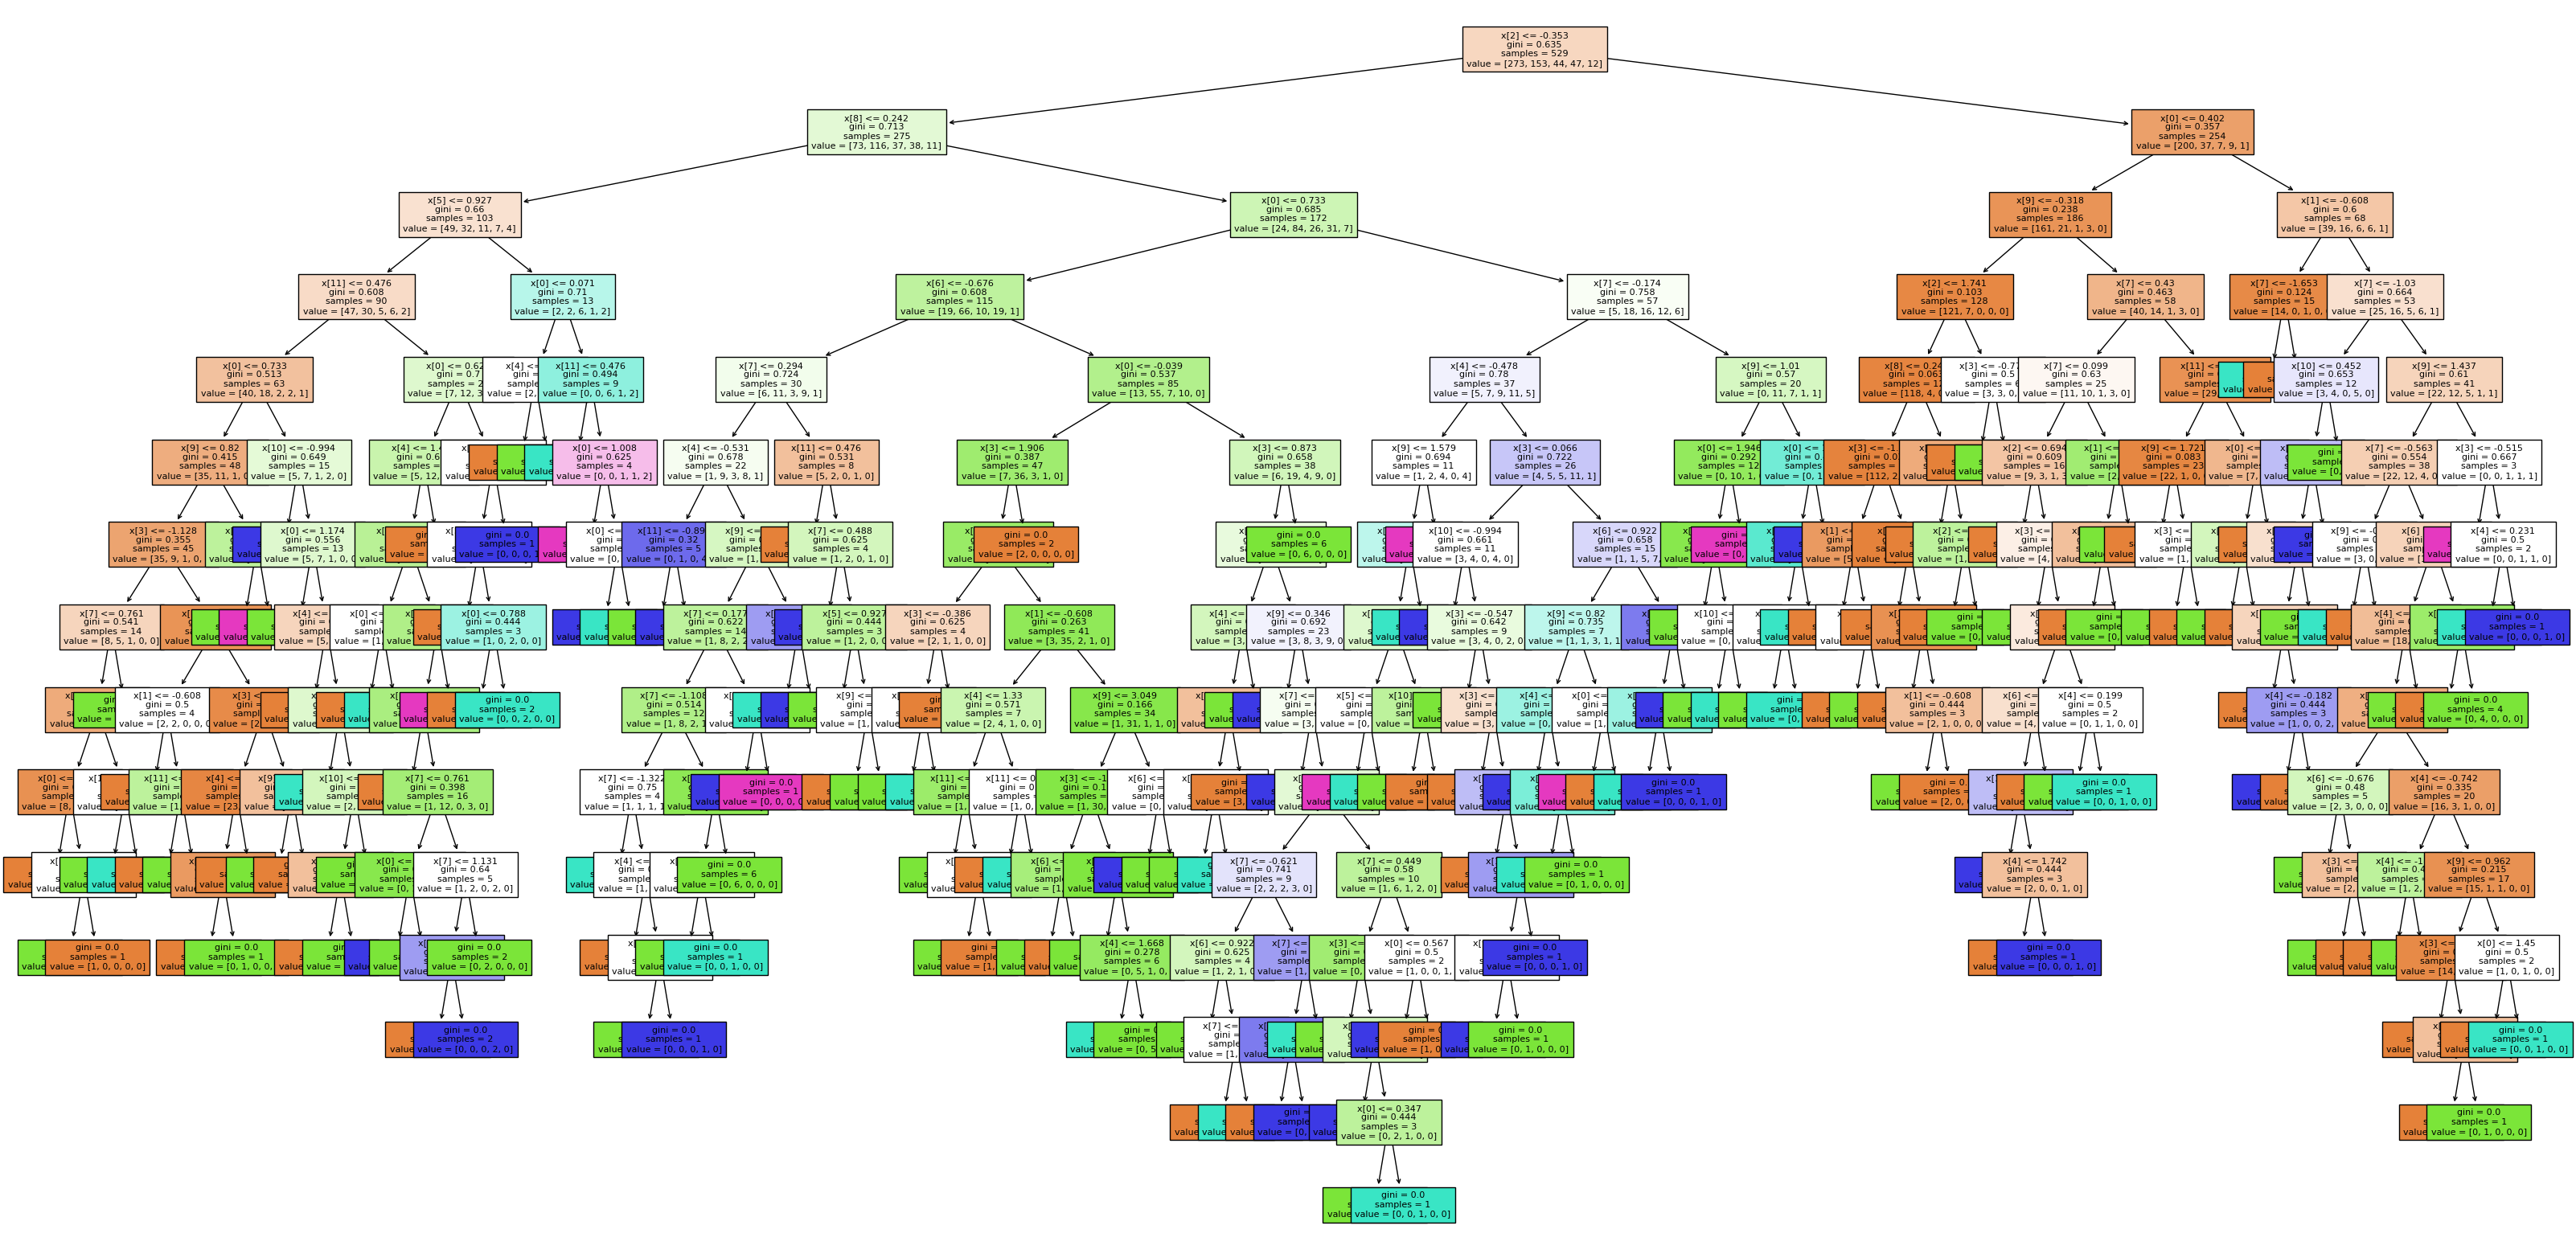

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(40,20))
plot_tree(model_DecisionTree,filled=True,fontsize=8)
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(y_test,y_pred)
print(cfm)

print("Classification Report:")
print(classification_report(y_test,y_pred))

acc = accuracy_score(y_test,y_pred)
print("Accuracy of model: {:.2f}%".format(acc*100))

[[64 10  2  0  0]
 [ 8 11  5  2  3]
 [ 2  5  1  1  1]
 [ 3  2  3  4  0]
 [ 2  1  2  1  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        76
           1       0.38      0.38      0.38        29
           2       0.08      0.10      0.09        10
           3       0.50      0.33      0.40        12
           4       0.00      0.00      0.00         6

    accuracy                           0.60       133
   macro avg       0.35      0.33      0.34       133
weighted avg       0.60      0.60      0.60       133

Accuracy of model: 60.15%


In [37]:
import numpy as np
from sklearn .metrics import roc_curve,roc_auc_score

# Predict probabilities
y_probs = model_DecisionTree.predict_proba(x_test)

# Calculate AUC for each class using 'ovr' (one-vs-rest)
auc = np.round(roc_auc_score(y_test, y_probs, multi_class='ovr'), 3)

# Calculate ROC curve for each class
fpr = {}
tpr = {}
thresholds = {}
for i in range(y_probs.shape[1]):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test == i, y_probs[:, i])

print("AUC for our sample data is {}".format(auc))

AUC for our sample data is 0.606


In [38]:
#feature importance for entropy
print(list(zip(data_new.columns[0:-1],model_DecisionTree.feature_importances_)))

[('age', 0.13365239799746395), ('sex', 0.035138131892991566), ('cp', 0.16345312964574146), ('trestbps', 0.09898319643824384), ('chol', 0.14542824634304857), ('fbs', 0.020892310303251747), ('restecg', 0.04460182023483947), ('thalch', 0.14198001457693704), ('exang', 0.032947816628642795), ('oldpeak', 0.10656887201144263), ('slope', 0.03331723239894893), ('thal', 0.043036831528448165)]


Using Gini

In [39]:
#predicting using the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=2)

#fit model on data and predict value
model_DecisionTree_gini.fit(x_train,y_train)

y_pred31 = model_DecisionTree_gini.predict(x_test)
print(y_pred31)
print(list(zip(y_test,y_pred31)))

[0 1 1 0 0 0 2 0 0 0 0 0 1 0 1 0 2 1 0 0 0 2 2 3 3 0 0 0 0 0 1 0 1 1 0 0 0
 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 3 0 1 3 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 3 1 0 0 0 0 0 0 0 3 0 0 0 3 0 1 0 0 1 0 0 1 0 0 0 0 3 0 3 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 2 1 0 0 0 3]
[(0, 0), (2, 1), (1, 1), (1, 0), (0, 0), (4, 0), (1, 2), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (2, 1), (0, 0), (0, 2), (1, 1), (0, 0), (1, 0), (0, 0), (1, 2), (3, 2), (3, 3), (2, 3), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (2, 1), (2, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (3, 1), (0, 0), (4, 1), (2, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (2, 1), (0, 0), (3, 0), (0, 0), (3, 1), (0, 0), (3, 3), (0, 0), (1, 1), (1, 3), (0, 0), (3, 1), (0, 0), (0, 0), (1, 0), (1, 1), (4, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (2, 1), (0, 0), (1, 0), (1, 3), (3, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (3, 3), (0, 0), 

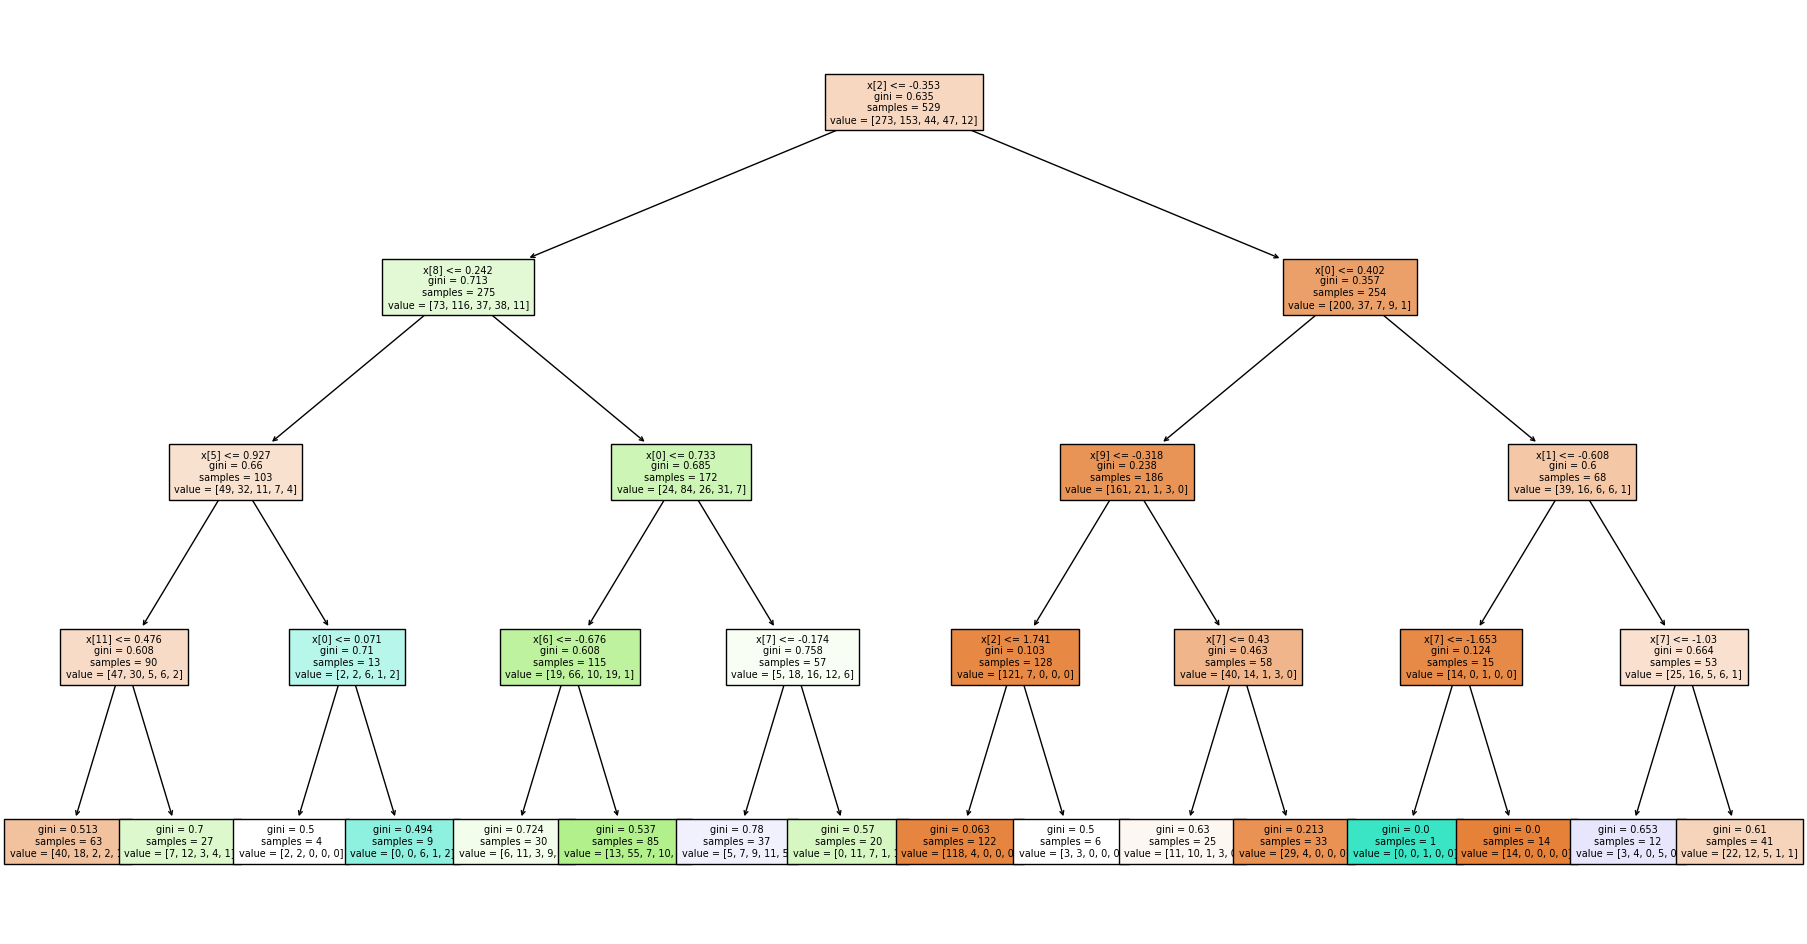

In [40]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(23,12))
plot_tree(model_DecisionTree_gini,filled=True,fontsize=7)
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(y_test,y_pred31)
print(cfm)

print("Classification Report:")
print(classification_report(y_test,y_pred31))

accuracy_DTGini = accuracy_score(y_test,y_pred31)
print("Accuracy: {:.2f}%".format(accuracy_DTGini * 100))

[[70  4  1  1  0]
 [11 13  3  2  0]
 [ 3  6  0  1  0]
 [ 2  4  1  5  0]
 [ 3  2  0  1  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        76
           1       0.45      0.45      0.45        29
           2       0.00      0.00      0.00        10
           3       0.50      0.42      0.45        12
           4       0.00      0.00      0.00         6

    accuracy                           0.66       133
   macro avg       0.35      0.36      0.35       133
weighted avg       0.59      0.66      0.62       133

Accuracy: 66.17%


c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
#feature importance for entropy
print(list(zip(data_new.columns[0:-1],model_DecisionTree_gini.feature_importances_)))

[('age', 0.1251682162279396), ('sex', 0.0357514814650215), ('cp', 0.4960639785227996), ('trestbps', 0.0), ('chol', 0.0), ('fbs', 0.03822859650266936), ('restecg', 0.024616260202860257), ('thalch', 0.10813624167036685), ('exang', 0.09855447875088025), ('oldpeak', 0.03958338961166059), ('slope', 0.0), ('thal', 0.03389735704580197)]


Using Entropy

In [43]:
#predicting using the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=2)

#fit model on data and predict value
model_DecisionTree_entropy.fit(x_train,y_train)

y_pred32 = model_DecisionTree_entropy.predict(x_test)
print(y_pred32)

print(list(zip(y_test,y_pred32)))

[0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0
 3 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 3 0 3 0 1 0 1 3 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1]
[(0, 0), (2, 1), (1, 1), (1, 0), (0, 0), (4, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (2, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (1, 1), (3, 1), (3, 1), (2, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (2, 1), (2, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (3, 3), (0, 0), (4, 1), (2, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (2, 1), (0, 0), (3, 0), (0, 0), (3, 1), (0, 0), (3, 1), (0, 0), (1, 1), (1, 3), (0, 0), (3, 3), (0, 0), (0, 1), (1, 0), (1, 1), (4, 3), (1, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (2, 1), (0, 0), (1, 0), (1, 0), (3, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (3, 1), (0, 1), 

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(23,12))
plot_tree(model_DecisionTree_entropy,filled=True,fontsize=8)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(y_test,y_pred32)
print(cfm)

print("Classification Report:")
print(classification_report(y_test,y_pred32))

accuracy_DTEntropy = accuracy_score(y_test,y_pred32)
print("Accuracy: {:.2f}%".format(accuracy_DTEntropy * 100))

[[66 10  0  0  0]
 [13 15  0  1  0]
 [ 3  7  0  0  0]
 [ 2  8  0  2  0]
 [ 2  3  0  1  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.81        76
           1       0.35      0.52      0.42        29
           2       0.00      0.00      0.00        10
           3       0.50      0.17      0.25        12
           4       0.00      0.00      0.00         6

    accuracy                           0.62       133
   macro avg       0.32      0.31      0.30       133
weighted avg       0.56      0.62      0.58       133

Accuracy: 62.41%


c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#feature importance for entropy
print(list(zip(data_new.columns[0:-1],model_DecisionTree_entropy.feature_importances_)))

[('age', 0.17701097563519141), ('sex', 0.031008949755244996), ('cp', 0.3910788190126714), ('trestbps', 0.0), ('chol', 0.0), ('fbs', 0.03216132366039907), ('restecg', 0.03131614716546457), ('thalch', 0.07625502771305591), ('exang', 0.05964902473095227), ('oldpeak', 0.13088099718254612), ('slope', 0.02924729734087603), ('thal', 0.04139143780359828)]


In [ ]:
#accuracies
# Decision Tree - 60.15%
# Decision Tree using Gini - 66.17%
# Decision Tree using Entropy - 62.41% 